In [65]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
import numpy as np
import cv2
import plotly
import os
from utils import *
from matplotlib.widgets import Slider
path = '../Imagens/'
plt.rcParams['image.cmap'] = 'gray' # Para mostrar as imagens em escala de cinza
plt.rcParams["figure.dpi"] = 100 

In [66]:
def imshow(img):
    cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

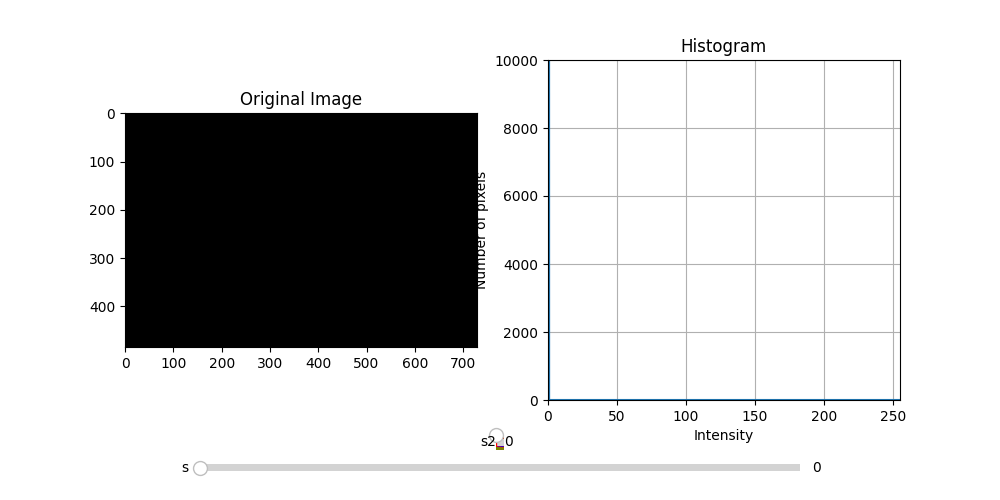

In [67]:
imfile = 'm3gtr.jpg'
img_gray = cv2.imread(os.path.join(path, imfile), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)
plt.show()

In [68]:
def nothing(x):
   pass

### Subtrair um escalar

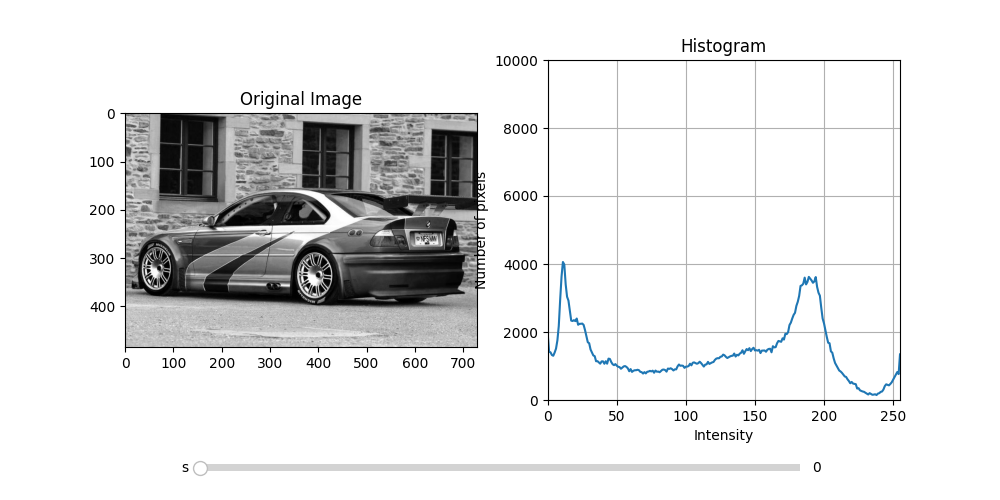

In [69]:
%matplotlib widget
#ou %matplotlib notebook


def plot_histogram_with_slider(img_gray):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(bottom=0.2)

    # Display the original image
    im = ax1.imshow(img_gray, cmap='gray')
    ax1.set_title('Original Image')
    s = 0
    # Display the histogram
    h = cv2.calcHist([img_gray],[0],None,[256],[0,256])
    line, = ax2.plot(h)
    ax2.set_xlim([0, 255])
    ax2.set_ylim([0, 10000])
    ax2.set_title('Histogram')
    ax2.set_xlabel('Intensity')
    ax2.set_ylabel('Number of pixels')
    ax2.set_xticks(np.arange(0, 256, 50))
    ax2.grid(True)
    sliders = Slider(ax=fig.add_axes([0.2, 0.05, 0.6, 0.03]), label='s', valmin=0, valmax=255, valinit=s, valstep=1)

    def update(val):
        s = sliders.val
        #im_sub = img_gray - s
        im_sub = cv2.subtract(img_gray, s)
        im.set_data(im_sub)
        h = cv2.calcHist([im_sub],[0],None,[256],[0,256])
        line.set_ydata(h)
        fig.canvas.draw_idle()

    sliders.on_changed(update)
    plt.show()

plot_histogram_with_slider(img_gray)


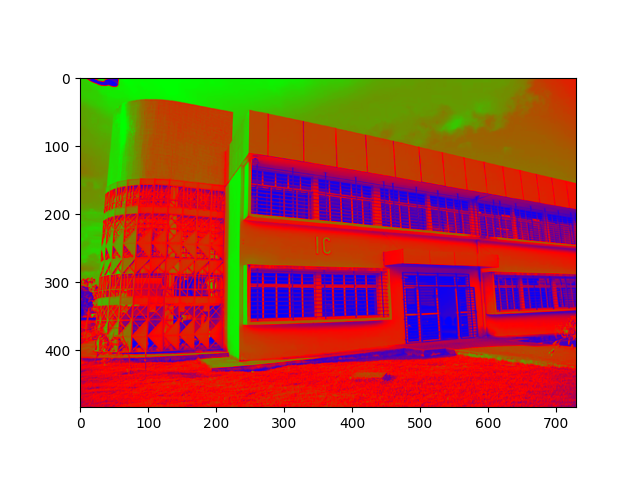

In [70]:
plt.figure()
imfile2 = 'ic2.png'
img_gray2 = cv2.imread(os.path.join(path, imfile2), cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray2)
plt.show()

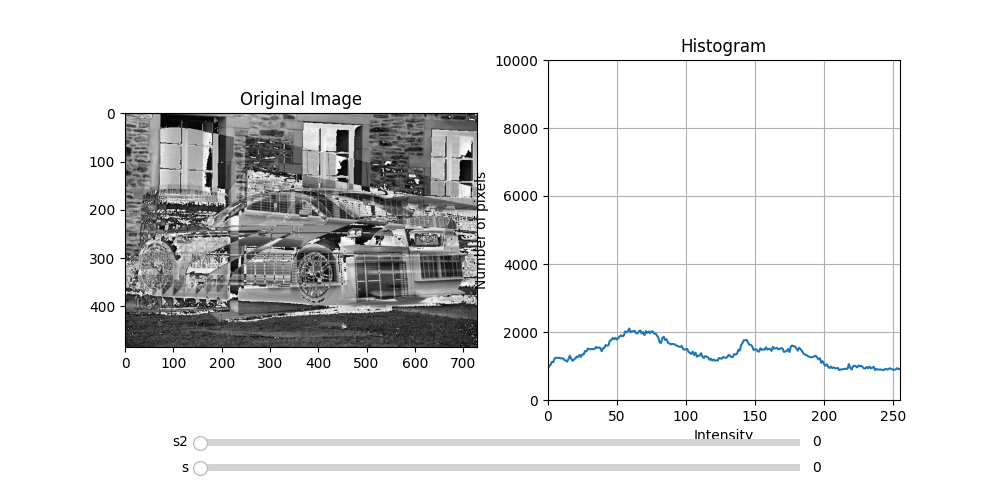

In [71]:
def plot_histogram_with_2sliders(img1, img2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(bottom=0.2)

    # Display the original image
    im_sum = img1 + img2
    s1 = 0
    s2 = 0
    im = ax1.imshow(im_sum, cmap='gray')
    ax1.set_title('Original Image')
    # Display the histogram
    h = cv2.calcHist([im_sum],[0],None,[256],[0,256])
    line, = ax2.plot(h)
    ax2.set_xlim([0, 255])
    ax2.set_ylim([0, 10000])
    ax2.set_title('Histogram')
    ax2.set_xlabel('Intensity')
    ax2.set_ylabel('Number of pixels')
    ax2.set_xticks(np.arange(0, 256, 50))
    ax2.grid(True)
    sliders = Slider(ax=fig.add_axes([0.2, 0.05, 0.6, 0.03]), label='s', valmin=0, valmax=255, valinit=s1, valstep=1)
    sliders2 = Slider(ax=fig.add_axes([0.2, 0.1, 0.6, 0.03]), label='s2', valmin=0, valmax=255, valinit=s2, valstep=1)

    def update(val):
        s1 = sliders.val
        s2 = sliders2.val
        im_mult1 = cv2.multiply(s1, img1)
        im_mult2 = cv2.multiply(s2, img2)
        im_mult = cv2.add(im_mult1, im_mult2)
        im.set_data(im_mult)
        h = cv2.calcHist([im_mult],[0],None,[256],[0,256])
        line.set_ydata(h)
        fig.canvas.draw_idle()

    sliders.on_changed(update)
    plt.show()

plot_histogram_with_2sliders(img_gray, img_gray2)

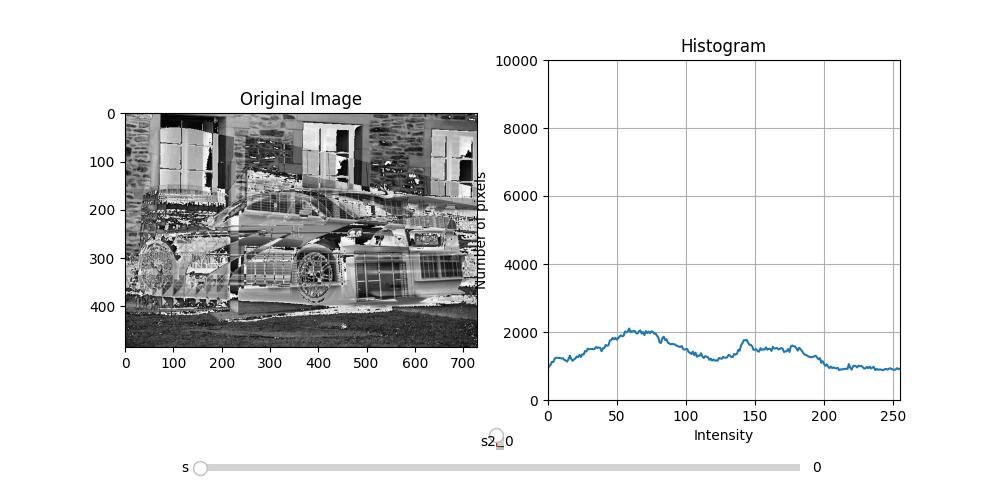

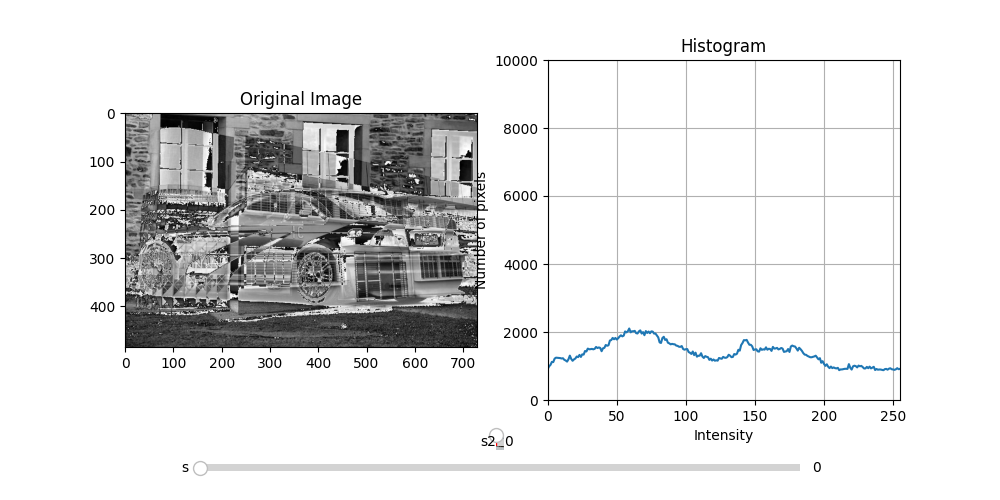

In [73]:

#Balanço de brnaco
def balance_white(image):
    # Converte a imagem para o espaço de cor LAB
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Separa os canais LAB
    l, a, b = cv2.split(lab)
    
    # Calcula o percentil 1 e 99 para o canal L
    lmin = int(round(max(0, np.percentile(l, 1))))
    lmax = int(round(min(255, np.percentile(l, 99))))
    
    # Redimensiona o canal L para o intervalo lmin-lmax
    l = np.uint8(np.clip((255.0 / (lmax - lmin) * (l - lmin)), 0, 255))
    
    # Mescla os canais LAB
    balanced_lab = cv2.merge([l, a, b])
    
    # Converte de volta para o espaço de cor BGR
    result = cv2.cvtColor(balanced_lab, cv2.COLOR_LAB2BGR)
    
    return result

imfile = 'm3gtr.jpg'
img2 = cv2.imread(os.path.join(path, imfile))
plt.imshow(img2)
plt.show()
img_balanced = balance_white(img2)
plt.imshow(img_balanced)
plt.show()
